# Trying out the Naive Bayes Classifier in Python using HAR Data set
1. [Data set link](https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset)
2. Using Naive Bayes Classifier (first without improvments)
3. Using same classifier but with improvments

In [140]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import yeojohnson
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## First, using the basic approach

In [156]:
# training_data = pd.read_csv('har_train.csv')
# testing_data = pd.read_csv('har_validate.csv')
training_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
testing_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')


- We notice that the data is mostly Numeric, so we need to use Gaussian classifier, which states that:
  $$P(X|Y=c) = \frac{1}{} e^{\frac{-(x-\mu)^2}{2\sigma_c^2}}$$
note: The difference between Gaussian Naive Bayes and Multinomial Naive Bayes is that for 
gaussian, the features are assumed to be continuous and follow a normal distribution.

In [158]:
# Divide the training and testing data into features and labels
x_train = training_data.drop('Species', axis=1)
y_train = training_data['Species']
x_test = testing_data.drop('Species', axis=1)
y_test = testing_data['Species']

### Creating the model

In [159]:
# Init the Gaussian Classifier
model = GaussianNB()
# Train the model 
model.fit(x_train, y_train)


GaussianNB()

### Predicting output

In [160]:
# Predict Output 
y_pred = model.predict(x_test)

### Evaluating the model

Accuracy: 0.9111111111111111
F1 Score: 0.9127199597787833


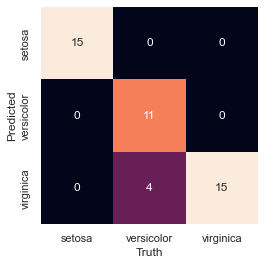

In [161]:
# Plot Confusion Matrix
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Checking to see features that are dependant on each other
   
(Since Naive Bayes is built on the assumption that features are independant)

- As we can see from the figure below, there are some features with very high correlation (i.e dependance)

<AxesSubplot:>

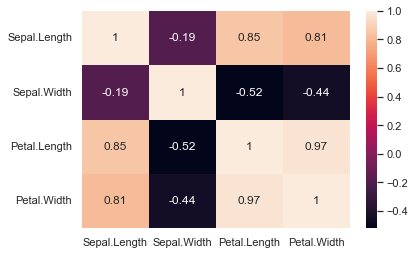

In [184]:
# check correlation between features
corr = training_data.corr()
sns.heatmap(corr, annot =True)

In [167]:
def mutual_info_relative_to(df,class_name):
    # Select best features
    X_train_feat, _, y_train_feat ,_ = train_test_split(df.drop(labels=[class_name], axis=1),
        df[class_name],
        test_size=0.3,
        random_state=0)

    mutual_info = mutual_info_classif(X_train_feat, y_train_feat)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train_feat.columns
    mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
    plt.title(f"Mutual Information Related to: {class_name}")
    plt.show()

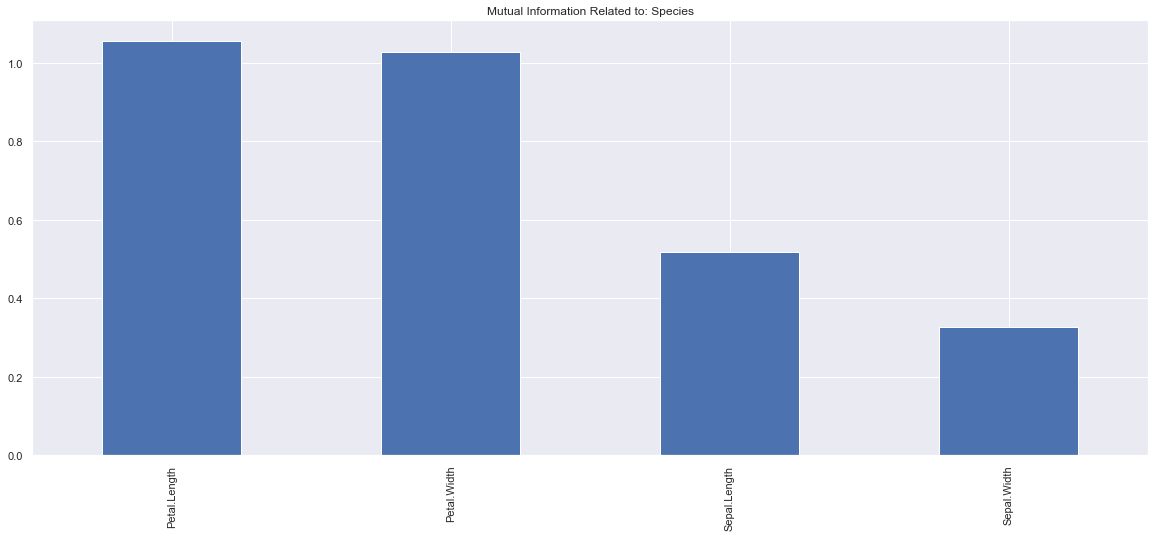

In [168]:
mutual_info_relative_to(training_data,'Species')

Now, let's discard a few of the dependant features and try again 
- note: We will only discard an arbitrary amount of features, not all, just to check for effect

Features to be discarded => ('roll_belt', 'accel_belt_y')

In [182]:
#Discarding the features 'roll_belt', 'accel_belt_y' from the training and testing data
x_train_2 = x_train.drop(['Sepal.Width'], axis=1)
x_test_2 = x_test.drop(['Sepal.Width'], axis=1)


Now Let's run the Model using the new data and test it

Accuracy: 0.9333333333333333
F1 Score: 0.9340067340067341


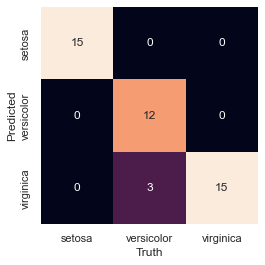

In [183]:
# Init the Gaussian Classifier
model_2 = GaussianNB()

# Use the new training and testing data to train the model
model_2.fit(x_train_2, y_train)
# Predict Output 
y_pred = model_2.predict(x_test_2)
# Plot Confusion Matrix
mat = confusion_matrix(y_pred, y_test)
names = np.unique(y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)